In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2024-02-29 21:12:43.935167: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 21:12:43.960131: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 21:12:43.960166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 21:12:43.960864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 21:12:43.965810: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices('GPU')

2024-02-29 21:12:45.287956: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 21:12:45.313549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 21:12:45.313606: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df = pd.read_csv("song_features 1.csv")

In [4]:
df.shape

(375141, 14)

In [5]:
df.columns

Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness',
       'valence', 'key', 'mode', 'time_signature', 'track_popularity'],
      dtype='object')

In [6]:
df.drop(columns=['duration_ms', 'key', 'mode', 'time_signature'], inplace=True)

In [7]:
df.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'tempo', 'speechiness', 'valence',
       'track_popularity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      374364 non-null  float64
 1   danceability      374364 non-null  float64
 2   energy            374364 non-null  float64
 3   instrumentalness  374364 non-null  float64
 4   liveness          374364 non-null  float64
 5   loudness          374364 non-null  float64
 6   tempo             374364 non-null  float64
 7   speechiness       374364 non-null  float64
 8   valence           374364 non-null  float64
 9   track_popularity  375131 non-null  float64
dtypes: float64(10)
memory usage: 28.6 MB


In [9]:
df = df

In [10]:
df.shape

(375141, 10)

In [11]:
df.shape

(375141, 10)

In [12]:
df.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'tempo', 'speechiness', 'valence',
       'track_popularity'],
      dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.98919525,  0.26030728,  0.11050252, ...,  1.82595461,
        -0.27018335, -0.65713081],
       [-1.04294505,  1.7119707 ,  0.66696411, ...,  0.13147798,
        -0.97979705, -0.59316569],
       [-0.84716209,  1.09881322,  0.7237459 , ...,  1.62949355,
         1.4306368 , -0.59316569],
       ...,
       [-1.06046248,  0.08736543,  1.06065122, ..., -0.53587568,
         0.51452175,  3.05284639],
       [-0.72880112,  0.04544013, -0.21126099, ..., -0.33450309,
        -0.69444974, -0.20937494],
       [-0.89311399,  0.42800847, -0.45352998, ..., -0.49658347,
        -1.55950264,  2.22129977]])

In [16]:
df = df.dropna()

In [17]:
scaled_df = pd.DataFrame(scaled_df, columns=['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'tempo', 'speechiness', 'valence',
       'track_popularity'])

In [18]:
scaled_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,speechiness,valence,track_popularity
0,-0.989195,0.260307,0.110503,-0.697247,1.115849,0.266328,-1.510817,1.825955,-0.270183,-0.657131
1,-1.042945,1.711971,0.666964,-0.697250,-0.249617,0.773812,-0.559374,0.131478,-0.979797,-0.593166
2,-0.847162,1.098813,0.723746,-0.697250,-0.403875,0.451118,-0.618095,1.629494,1.430637,-0.593166
3,-1.062635,1.947800,0.216495,-0.697250,-0.574701,0.312144,-0.447009,1.107644,-0.758277,-0.657131
4,-1.038211,-0.237556,0.439837,-0.697250,-0.627263,0.011594,1.771868,3.766008,-0.277692,-0.657131
...,...,...,...,...,...,...,...,...,...,...
375136,-1.058652,-0.132742,1.072008,-0.696449,-0.788376,1.163549,0.696558,-0.471412,0.736041,1.581649
375137,1.170544,-1.039377,-0.078770,-0.697250,3.218323,0.434013,-0.315442,-0.475096,-0.690695,2.733021
375138,-1.060462,0.087365,1.060651,-0.697250,0.247435,1.098644,-0.185776,-0.535876,0.514522,3.052846
375139,-0.728801,0.045440,-0.211261,1.298867,0.967304,0.126591,-1.264985,-0.334503,-0.694450,-0.209375


In [19]:
scaled_df.isna().sum()

acousticness        777
danceability        777
energy              777
instrumentalness    777
liveness            777
loudness            777
tempo               777
speechiness         777
valence             777
track_popularity     10
dtype: int64

In [20]:
scaled_df.dropna(inplace=True)

In [21]:
scaled_df.isna().sum()

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
tempo               0
speechiness         0
valence             0
track_popularity    0
dtype: int64

In [22]:
X = scaled_df[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'tempo', 'speechiness', 'valence']]
y = scaled_df['track_popularity']

Creating the Neural Network

In [23]:
model = tf.keras.models.Sequential()

2024-02-29 21:12:45.821633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 21:12:45.821720: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 21:12:45.821734: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 21:12:45.920499: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 21:12:45.920557: I external/local_xla/xla/stream_executor

In [24]:
model.add(tf.keras.layers.Input(9))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.add(tf.keras.layers.Dense(30, activation='relu',input_shape=(9,)))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
Total params: 300 (1.17 KB)
Trainable params: 300 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 100)               3100      
                                                                 
Total params: 3400 (13.28 KB)
Trainable params: 3400 (13.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.add(tf.keras.layers.Dense(250, activation='relu'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 100)               3100      
                                                                 
 dense_2 (Dense)             (None, 250)               25250     
                                                                 
Total params: 28650 (111.91 KB)
Trainable params: 28650 (111.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.add(tf.keras.layers.Dense(50, activation='relu'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 100)               3100      
                                                                 
 dense_2 (Dense)             (None, 250)               25250     
                                                                 
 dense_3 (Dense)             (None, 50)                12550     
                                                                 
Total params: 41200 (160.94 KB)
Trainable params: 41200 (160.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# model.add(tf.keras.layers.Dense(100, activation='linear'))

In [35]:
# model.summary()

In [36]:
model.add(tf.keras.layers.Dense(1))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 100)               3100      
                                                                 
 dense_2 (Dense)             (None, 250)               25250     
                                                                 
 dense_3 (Dense)             (None, 50)                12550     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 41251 (161.14 KB)
Trainable params: 41251 (161.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss=tf.keras.losses.mean_absolute_error, optimizer=tf.keras.optimizers.Adam(lr=0.1), metrics=['mae', 'accuracy'], run_eagerly=False)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3)

In [40]:
type(x_train)

pandas.core.frame.DataFrame

In [41]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [42]:
type(x_train)
type(y_train)

numpy.ndarray

In [43]:
x_train.shape

(262047, 9)

In [44]:
y_train.shape

(262047,)

In [45]:
# h = model.fit(x_train, y_train, batch_size=32, epochs=10)
h = model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2024-02-29 21:12:47.104264: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-29 21:12:47.201593: I external/local_xla/xla/service/service.cc:168] XLA service 0x56237159afb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-29 21:12:47.201630: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-02-29 21:12:47.205413: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-29 21:12:47.217754: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709259167.270436   52506 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8189/8189 [==============================] - 29s 3ms/step - loss: 0.6111 - mae: 0.6111 - accuracy: 0.0000e+00
Epoch 2/5
8189/8189 [==============================] - 27s 3ms/step - loss: 0.6062 - mae: 0.6062 - accuracy: 0.0000e+00
Epoch 3/5
8189/8189 [==============================] - 27s 3ms/step - loss: 0.6049 - mae: 0.6049 - accuracy: 0.0000e+00
Epoch 4/5
8189/8189 [==============================] - 28s 3ms/step - loss: 0.6037 - mae: 0.6037 - accuracy: 0.0000e+00
Epoch 5/5
8189/8189 [==============================] - 29s 4ms/step - loss: 0.6030 - mae: 0.6030 - accuracy: 0.0000e+00


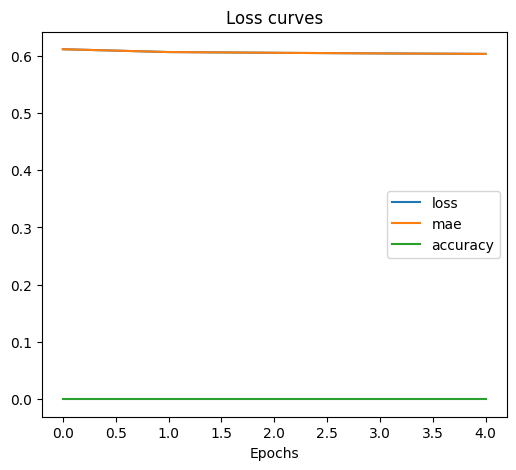

In [46]:
pd.DataFrame(h.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend()